In [97]:
!pip install missingno

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import missingno as msno
import warnings
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.impute import SimpleImputer

In [99]:
print(pd.__version__)
sns.set(style='dark',context='paper')
warnings.filterwarnings("ignore")

2.2.3


In [195]:
listings_data_url = '/Users/apple/Desktop/ml capstone project/listings.csv'
listings = pd.read_csv(listings_data_url)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [197]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [102]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

#### Listing out the categorical variables
- host_response_time 5 categories ['within a few hours','within an hour',nan,'within a day','a few days or more']  
- host_is_superhost ['f', 't', nan]
- host_has_profile_pic ['t', 'f', nan]
- host_identity_verified ['t', 'f', nan]
- is_location_exact ['t', 'f']
- property_type ['Apartment','House','Cabin','Condominium','Camper/RV','Bungalow','Townhouse',
  'Loft', 'Boat','Bed & Breakfast','Other','Dorm','Treehouse','Yurt','Chalet','Tent',nan]
- room_type ['Entire home/apt', 'Private room', 'Shared room']
- bed_type ['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch']
- amenities : set data with as a string . It will be custom parsed the datatype will be changed to array type for each row and then passed into MultiLabelBinarizer for one hot encoding.
- has_availability ['t', 'f', nan]
- requires_license ['t', 'f', nan]
- instant_bookable ['t', 'f', nan]
- cancellation_policy ['moderate', 'strict', 'flexible', nan]
- require_guest_profile_picture ['t', 'f', nan]
- require_guest_phone_verification ['t', 'f', nan]

#### Listing variables that should be converted to numeric type or is numeric already
- **id**
- **host_response_rate** to be converted to numeric values and needs cleaning of the string
- **host_acceptance_rate** 3 categories including Nan ['100%', nan, '0%'] can be converted to numeric type
- **price** to be converted to numeric values and needs cleaning of the string
- **cleaning_fee** to be converted to numeric values and needs cleaning of the string 
- **extra_people** to be converted to numeric values and needs cleaning of the string 
- **weekly_price** to be converted to numeric values and needs cleaning of the string
- **monthly_price** to be converted to numeric values and needs cleaning of the string
- **extra_people** to be converted to numeric values and needs cleaning of the string
- **host_listings_count**
- **accomodates**
- **bathrooms**
- **bedrooms**
- **beds**
- **square_feet**
- **guests_included** 
- **minimum_nights** 
- **maximum_nights**
- **availability_30**
- **availability_60**
- **availability_90**
- **availability_365**
- **review_scores_rating**
- **review_scores_accuracy**
- **review_scores_cleanliness**
- **review_scores_checkin**
- **review_scores_communication**
- **review_scores_location**
- **review_scores_value**
- **calculated_host_listings_count**
- **reviews_per_month**

#### Listing date type features 
- first_review, last_review -> can give estimate about thetime_period for which the property is active and utilized by the customers
- hosted_since, last_scraped -> can give information about the age of the listing

In [106]:
listings['cancellation_policy'].unique()

array(['moderate', 'strict', 'flexible'], dtype=object)

#### Getting a list of all the columns with null values greater than 70%

In [108]:
null_greater_than_seventy_percent = [col for col in listings.columns if listings[col].isnull().sum()/len(listings) > 0.7]
listings.drop(null_greater_than_seventy_percent,axis=1,inplace=True)
null_greater_than_seventy_percent

['square_feet', 'license']

In [109]:
listings['last_review'] = pd.to_datetime(listings['last_review'],errors='coerce')
listings['first_review'] = pd.to_datetime(listings['first_review'],errors='coerce')


# converting the time delta to log(review_period_days) to make the curve like a normalized curve
# replacing null values of log_review_period_days with 0 will give infinity values when log is calculated. So we replace them with a large value
listings["log_review_period_days"] = pd.to_numeric((listings['last_review'] - listings['first_review']).dt.days).fillna(0).apply(np.log).replace(np.inf,np.power(np.inf,10**10)) 
listings.drop(['first_review','last_review'],axis=1,inplace=True) 

In [110]:
price_based_columns = ['price','security_deposit','cleaning_fee','extra_people','weekly_price',
                       'monthly_price']
boolean_based_columns= ["host_is_superhost",'require_guest_profile_picture',"host_has_profile_pic","host_identity_verified",
"is_location_exact","has_availability","requires_license","instant_bookable",
"require_guest_phone_verification"]

#### Data cleaning

In [112]:
listings = listings[~(listings['zipcode'] == '99\n98122')]
#erratic data from the dataset

- converting the calendar updated data to updation_score
- we want to penalize listings that have not been updated and we will reward recently updated listings
- we will transform the listings with the following decay function
- this will normalize the data and also give appropriate weights 
- f(x) = a*e^(-kx) -> a is the max value (= 1) (x is the no of days elapsed)
- generally we may want to consider that the listing below 6 months can have a score close to 0 (This may change based on business requirements)
- (we assume f(x) <0.05) => k = -(ln(0.05)/180)
- k = 0.1 and we define the scoring function as below

In [114]:
def update_score(text,k=-np.log(0.05) / 180):
    no_days_elapsed = 0
    if not text or (isinstance(text, float) and np.isnan(text)) or not text.strip() or text.strip().lower() in ['never']: no_days_elapsed = np.inf
    elif text=='today': no_days_elapsed = 0
    elif text =='yesterday': no_days_elapsed = 1
    else :
        num_val_str,period,_= text.split()
        try:
            num_val = 1 if num_val_str.lower() == 'a' else int(num_val_str.strip())
            if(period.strip().lower() in ("day","days")): no_days_elapsed = num_val
            elif(period.strip().lower() in ("week","weeks")):no_days_elapsed = num_val * 7       
            elif(period.strip().lower() in ("month","months")): no_days_elapsed = num_val * 30  
            else :
                print("Invalid data format")
                no_days_elapsed = np.inf    
        except ValueError:
             print(f"The value cannot be converted to an integer / Invalid data {text}")
             return 0
    return 1*np.exp(-k*no_days_elapsed)

In [115]:
listings['update_score'] = listings['calendar_updated'].apply(update_score)
listings['update_score']

0       0.627506
1       1.000000
2       0.558498
3       0.050000
4       0.442416
          ...   
3813    1.000000
3814    0.967262
3815    0.935596
3816    0.000000
3817    0.890029
Name: update_score, Length: 3817, dtype: float64

In [116]:
## converts the data from "['a','b'','c']" (string) to ['a','b','c'] (list). 
## If the string cannot be converted to a list then we return empty list
verifications_parser  = lambda x: np.array(ast.literal_eval(x)) if pd.notna(x) else np.array([])

#### Remove redundant columns with no informational values

In [118]:
removables = ['listing_url','scrape_id','name','summary','description','experiences_offered',
              'neighborhood_overview','notes','transit','thumbnail_url','medium_url',
              'picture_url','xl_picture_url','host_id','host_url','host_name','host_location',
              'host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','street',
              'state','market','country','smart_location','country_code','jurisdiction_names','space']

In [119]:
listings.drop(removables,inplace=True,axis=1)

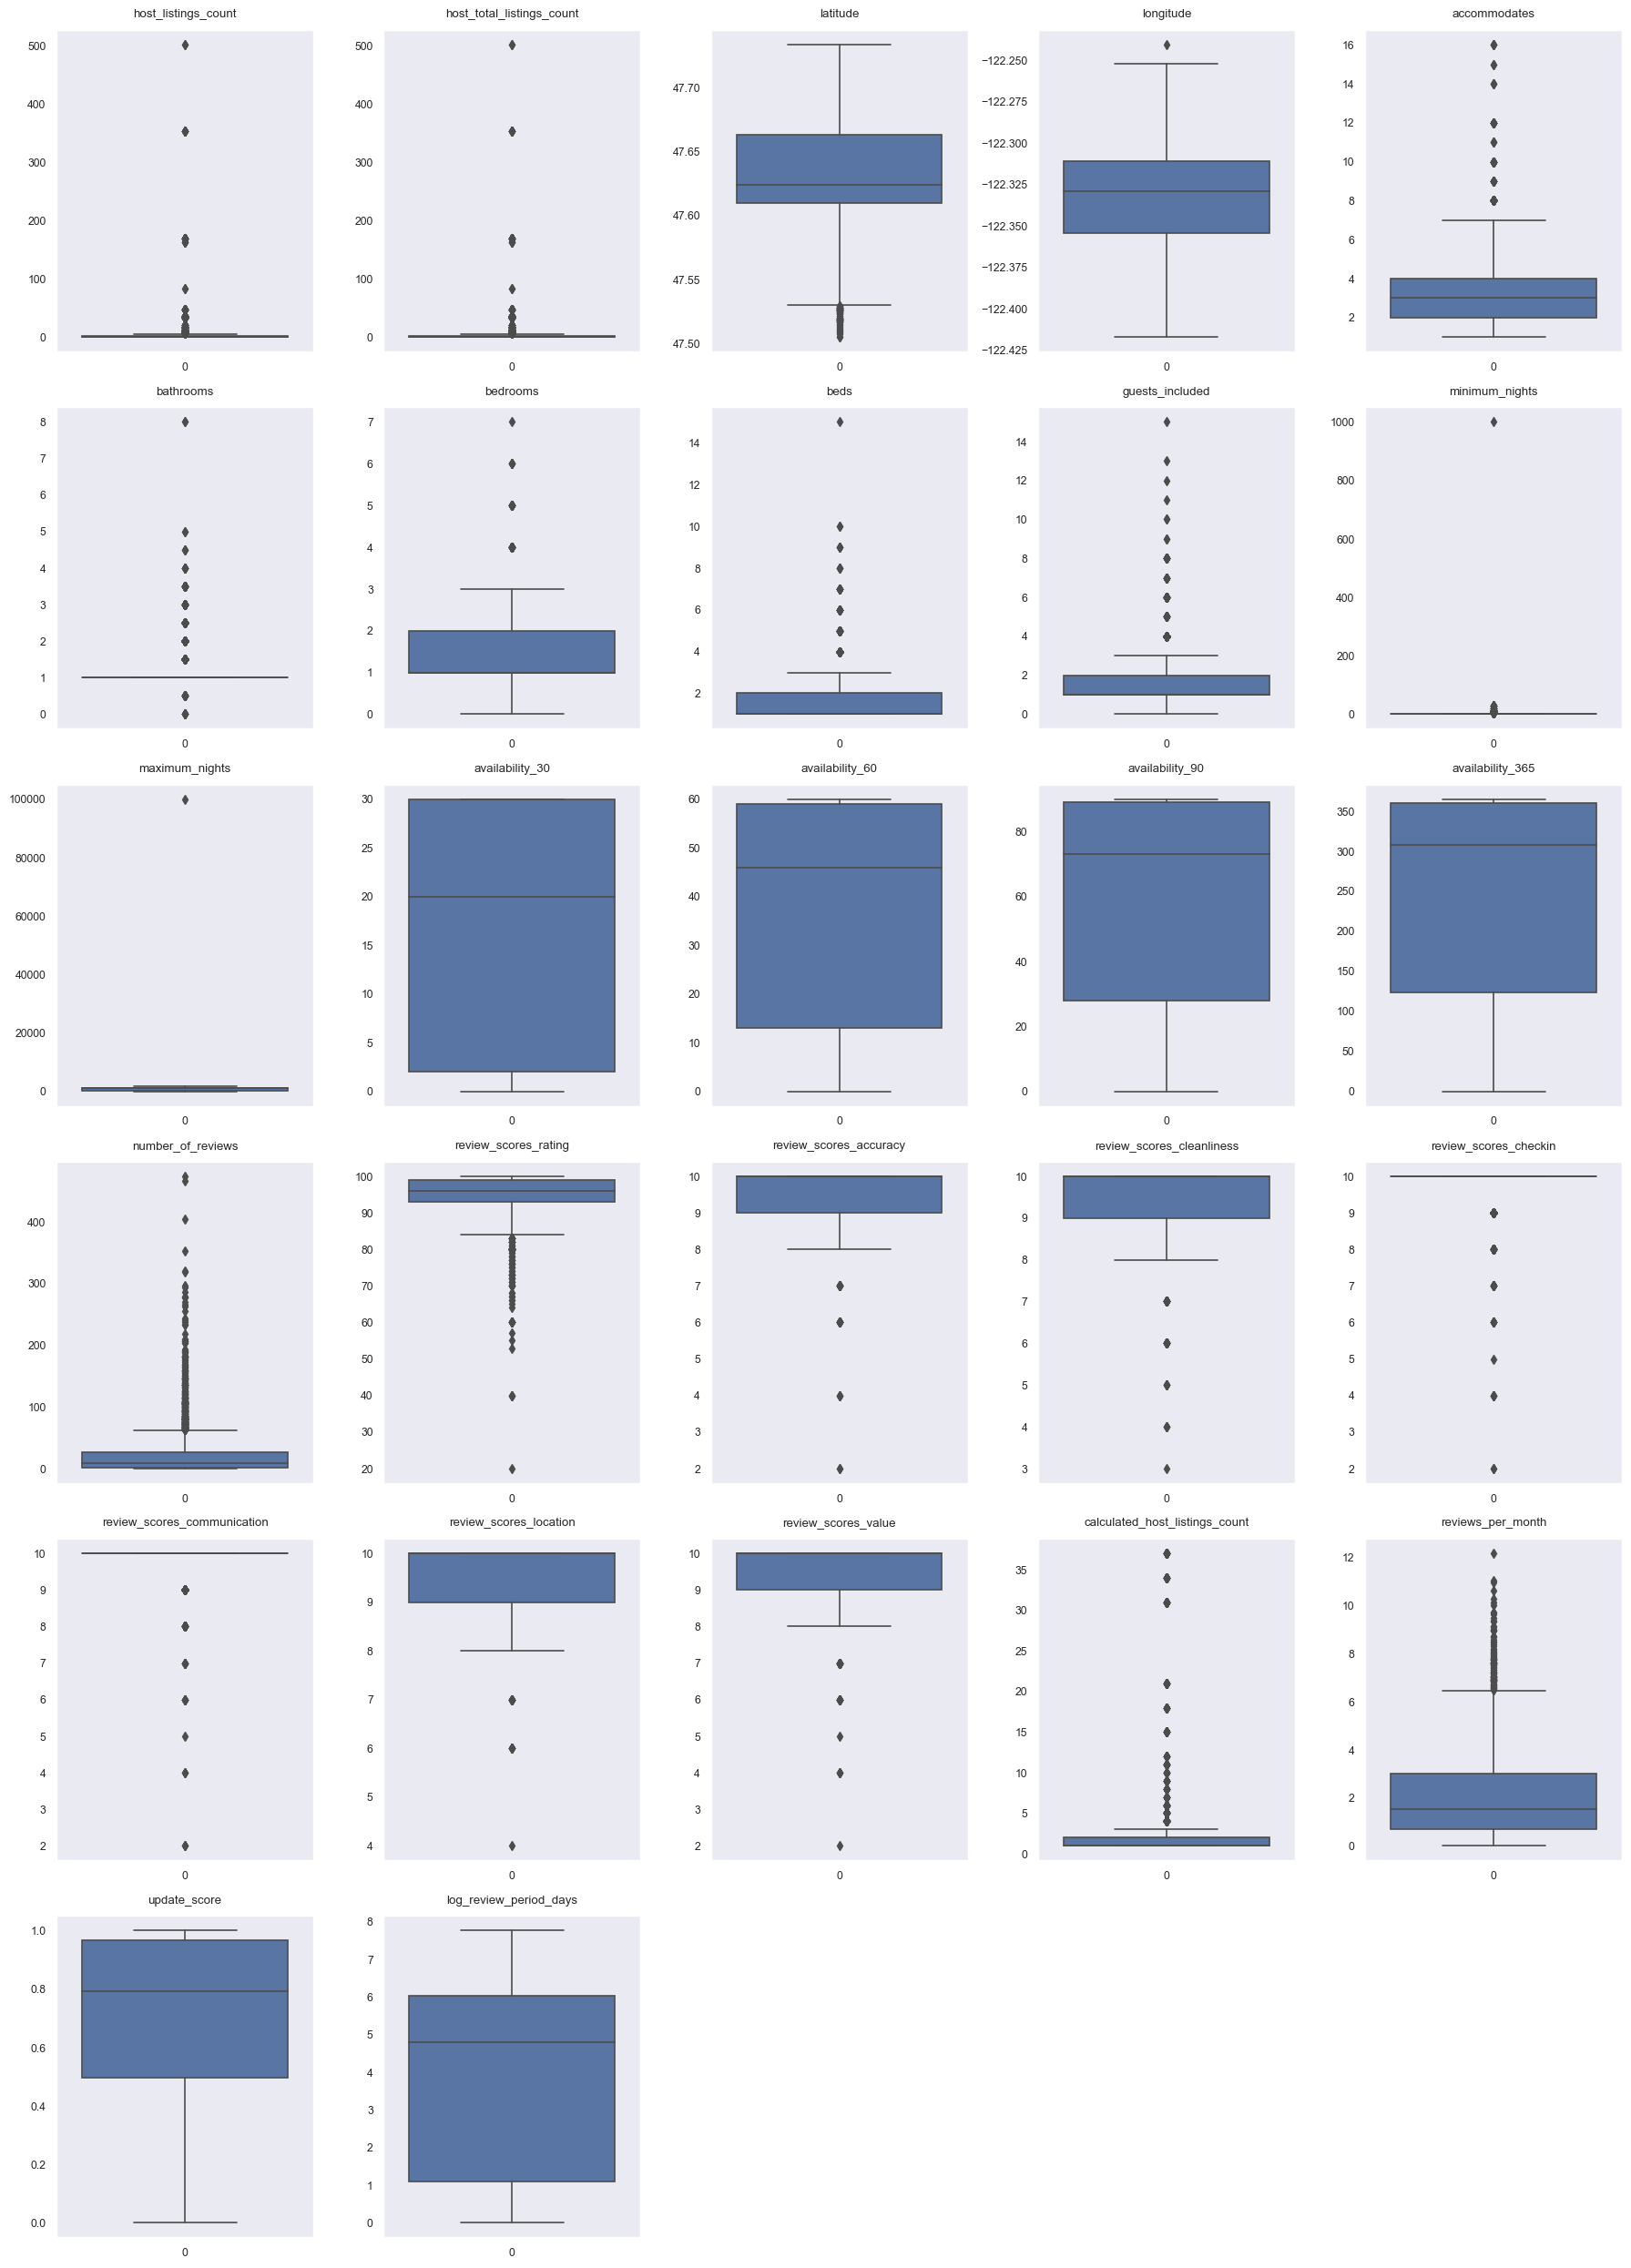

In [120]:
numerical_columns = ['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month', 'update_score',"log_review_period_days"]
fig,axes = plt.subplots(6,5,figsize=(18,25))
ax= axes.ravel()
for i in range(len(numerical_columns)):
   ax[i].set_title(numerical_columns[i],pad=10) 
   sns.boxplot(listings[numerical_columns[i]],ax=ax[i]) 
for j in range(len(numerical_columns), len(ax)):
    ax[j].set_visible(False)    
plt.tight_layout()  
plt.show()
plt.close()

#### Remove outliers in the dataset

#### replacing features to adjust the distributions to make it look like a normal distribution
- reviews_per_month -> Replace with log(reviews_per_month)

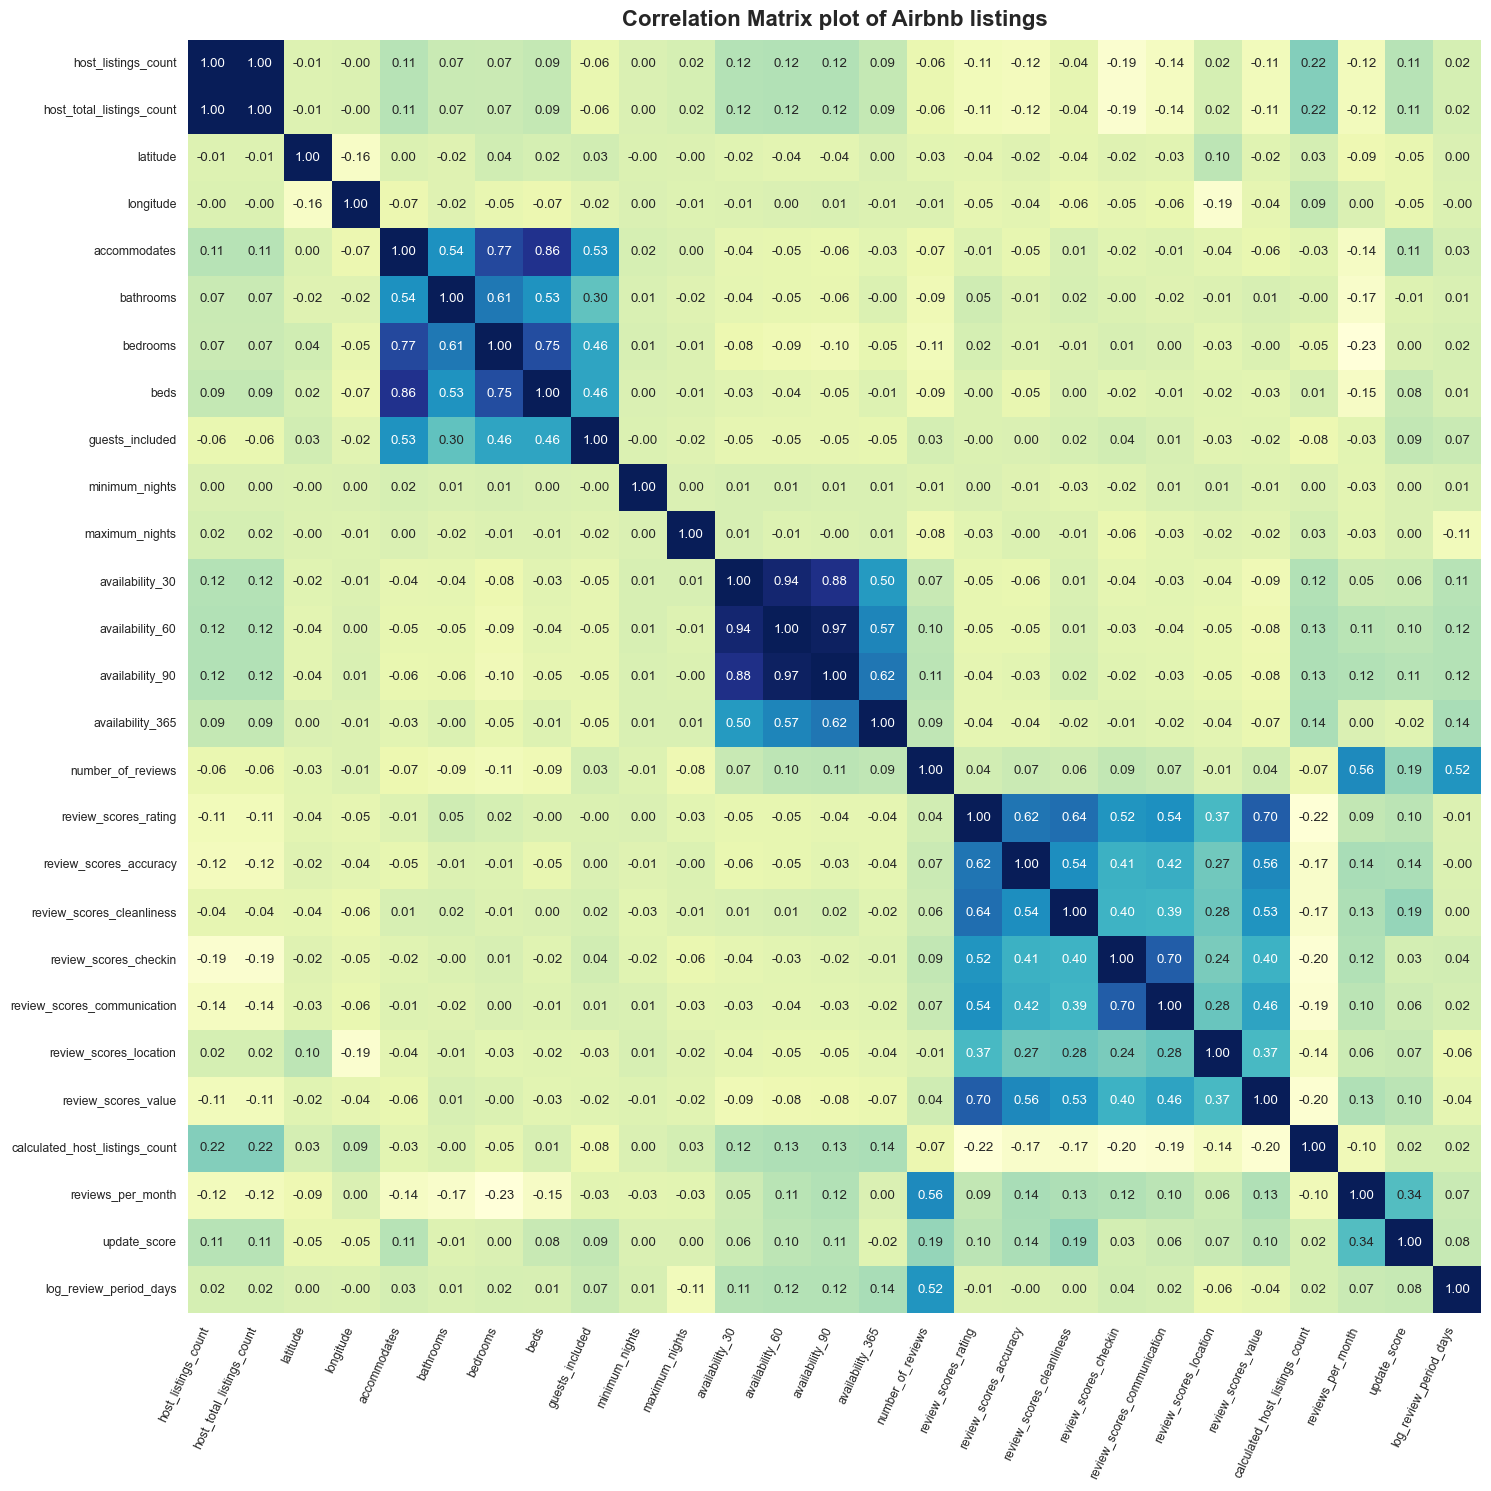

In [123]:
plt.figure(figsize=(15,15))
sns.heatmap(data=listings[numerical_columns].corr().fillna(0),cmap='YlGnBu',annot=True,fmt='.2f',cbar=False)
plt.title("Correlation Matrix plot of Airbnb listings",fontweight="heavy",pad=10,fontsize=16)
plt.xticks(rotation=65,ha='right')
plt.tight_layout()
plt.show()

# accomodates,beds,bedrooms
# availability_30,availability_60,availability_90

#### dropping availability_60,availability_90,beds,accomodates,host_total_listings_count due to high correlation values

In [125]:
### updating the numerical_columns after dropping them
cols_to_drop = ['availability_60','availability_90','beds','accommodates','host_total_listings_count']
listings.drop(cols_to_drop,axis=1,inplace=True)
for c in cols_to_drop:
    numerical_columns.remove(c)

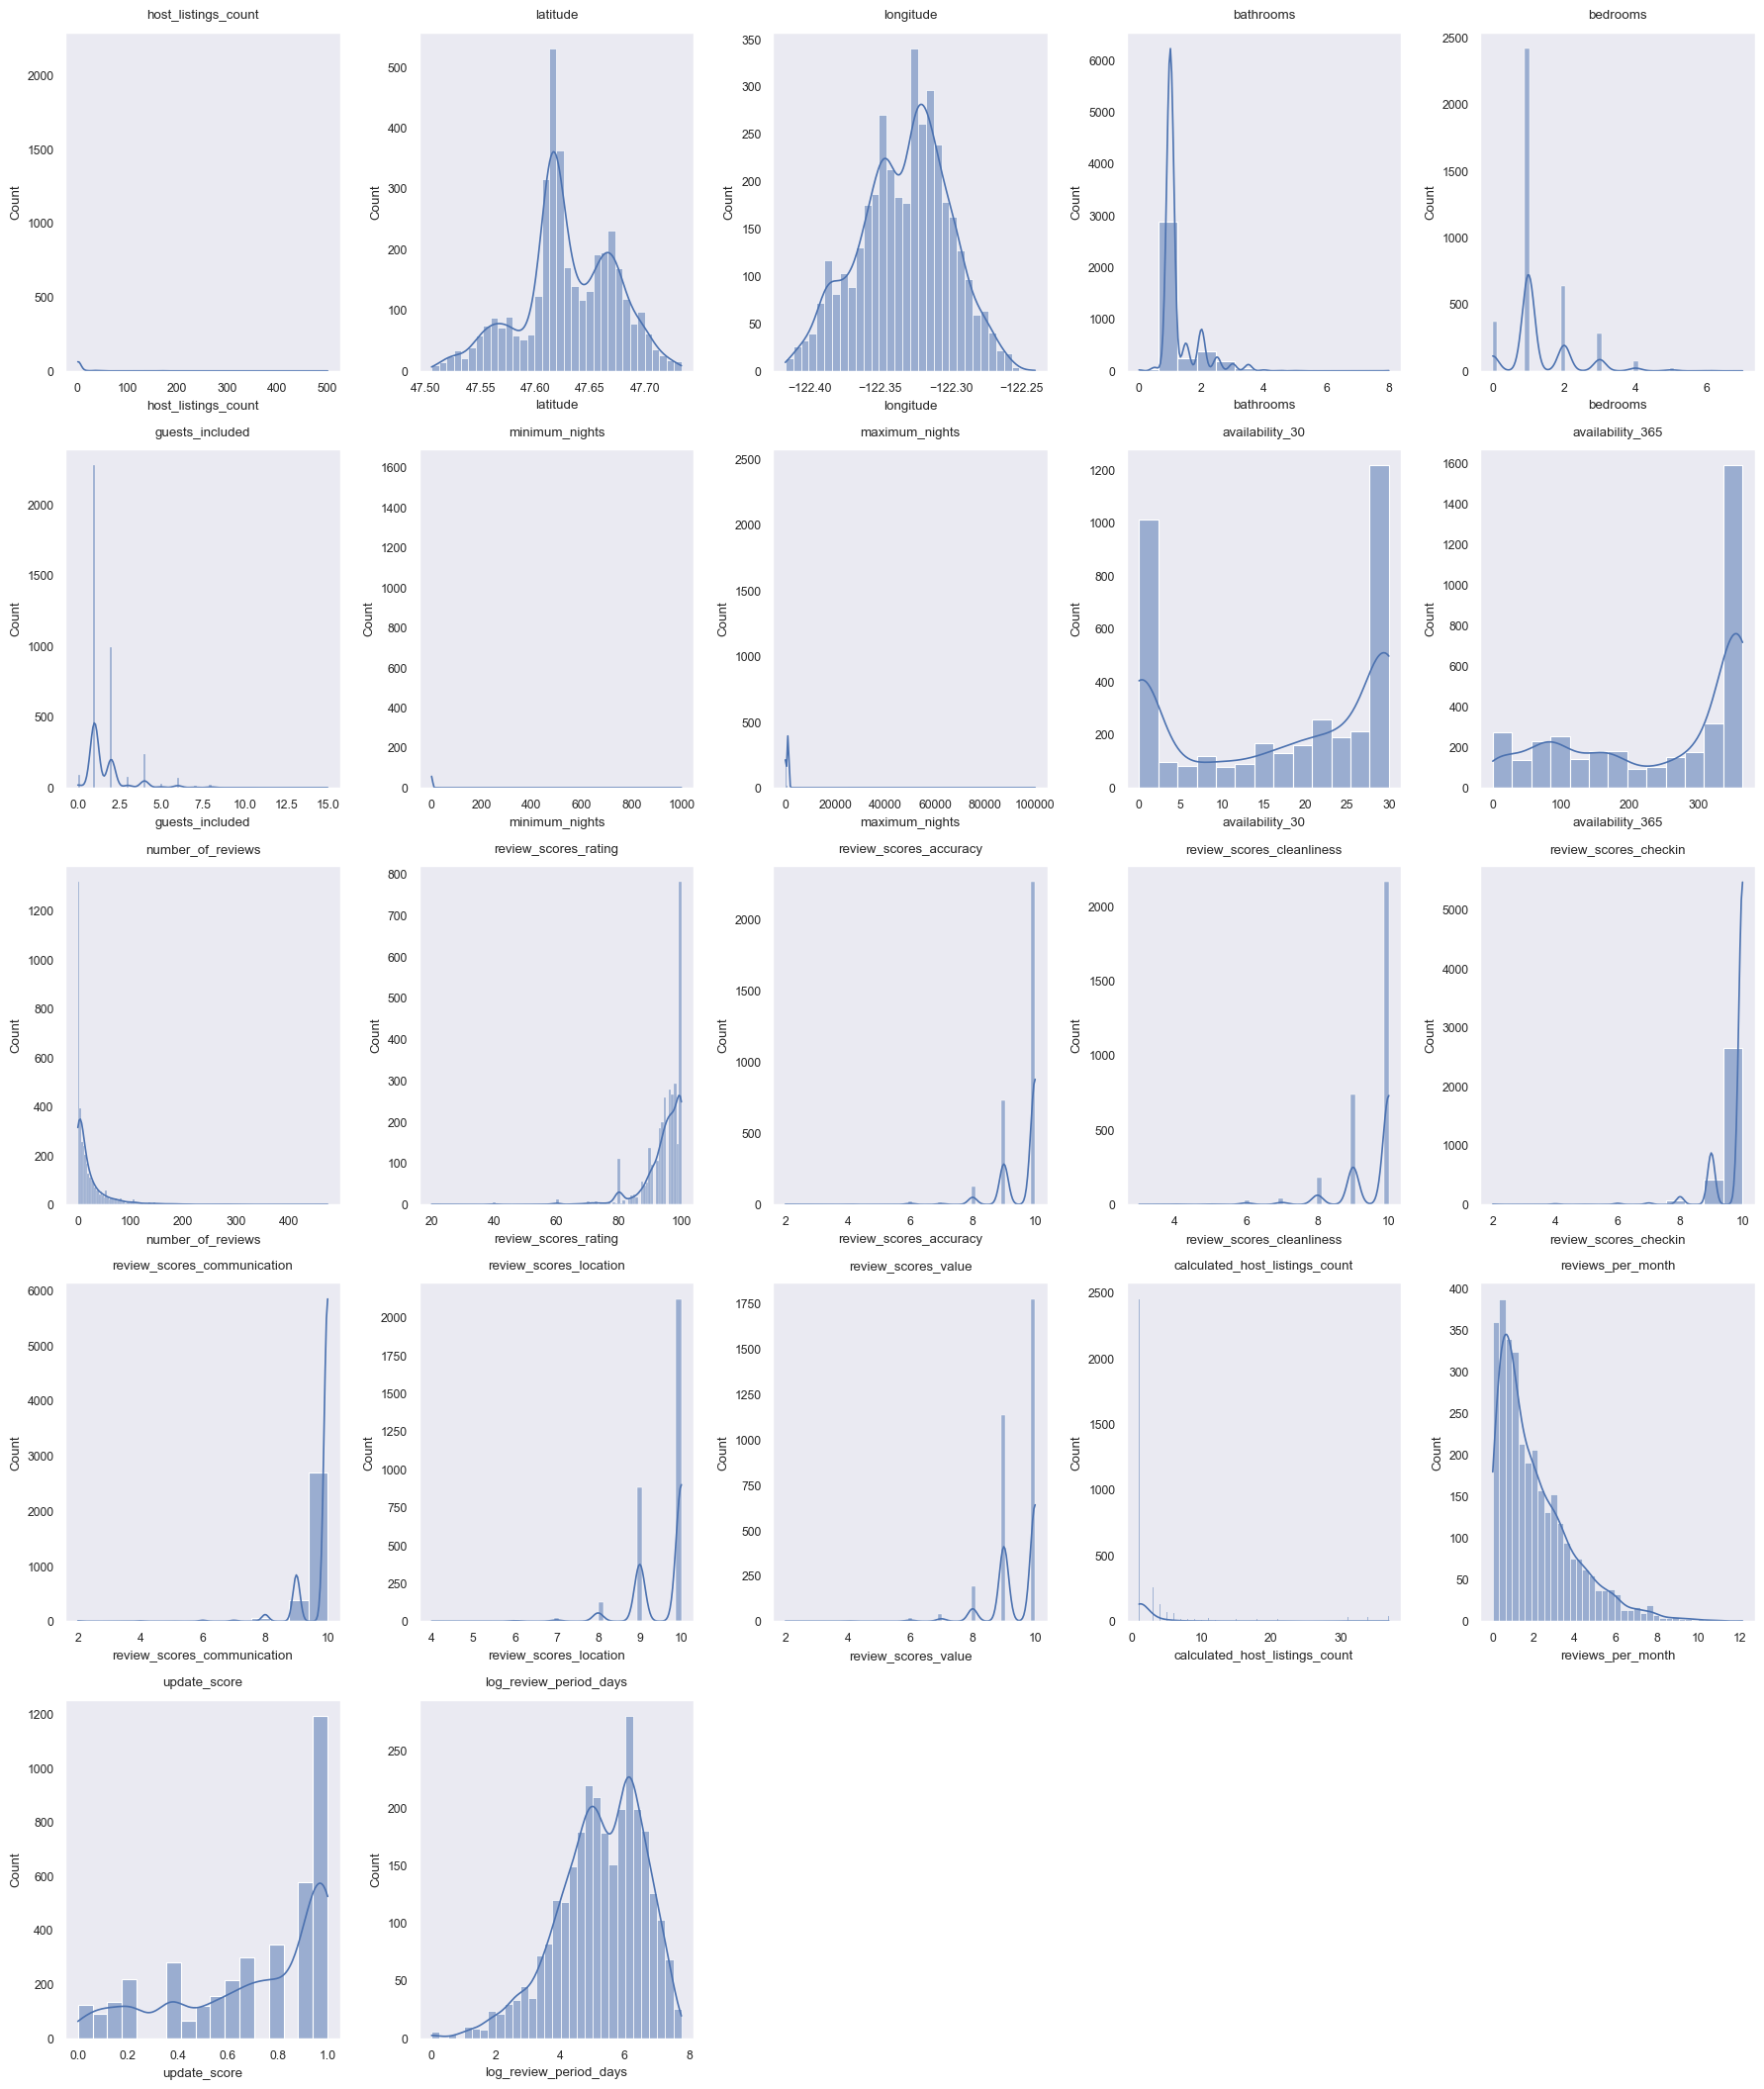

In [126]:
fig,axes = plt.subplots(6,5,figsize=(18,25))
ax= axes.ravel()
for i in range(len(numerical_columns)):
   ax[i].set_title(numerical_columns[i],pad=10) 
   sns.histplot(listings[numerical_columns[i]],ax=ax[i],kde=True) 

for j in range(len(numerical_columns), len(ax)):
    ax[j].set_visible(False) 
plt.tight_layout()    
plt.show()
plt.close()

In [127]:
#parsing and encoding the amenities column
def amenities_parser(text):
    if(not text): return np.array([])
    text = text.strip().replace('"','').replace("'",'')
    amenities = text[text.find('{')+1:text.rfind('}')].split(",")
    if(not amenities): return np.array([])
    return np.array([amenity.strip() for amenity in amenities if amenity]) 

In [128]:
for i in ['amenities','host_verifications'] :
    mlb = MultiLabelBinarizer()
    listings[i] = listings[i].apply(amenities_parser if i=='amenities' else verifications_parser)
    data_encoded = mlb.fit_transform(listings[i])
    encoded_df = pd.DataFrame(data_encoded,columns=[f"{i}_{cls}" for cls in mlb.classes_])
    listings = pd.concat([listings.drop(i,axis=1),encoded_df],axis=1)

#### cleaning price based columns -> remove the dollar and , character from the strings and convert to float values

In [130]:
for column in price_based_columns:
    listings[column] = listings[column].apply(lambda x: float(x.replace("$", "").replace(",", "")) if isinstance(x, str) else x)
boolean_based_columns

['host_is_superhost',
 'require_guest_profile_picture',
 'host_has_profile_pic',
 'host_identity_verified',
 'is_location_exact',
 'has_availability',
 'requires_license',
 'instant_bookable',
 'require_guest_phone_verification']

(array([0]), [Text(0, 0, '')])

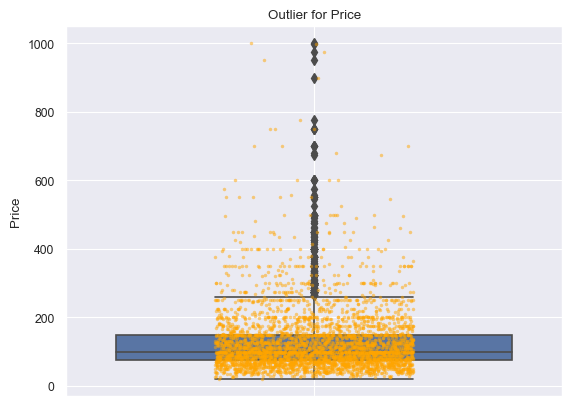

In [131]:
sns.boxplot(y='price', data=listings)
sns.stripplot(y='price', data=listings, color="orange", alpha=0.5, jitter=0.2, size=2.5)
plt.title("Outlier for Price")
plt.grid(True)
plt.ylabel("Price");
plt.xticks()

### Removing outliers of price in the dataset

In [133]:
# Calculate Q1, Q3, and IQR
q1 = listings['price'].quantile(0.25)
q3 = listings['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"Q1: {q1}, Q3: {q3}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
listings_no_outliers = listings[(listings['price'] >= lower_bound) & (listings['price'] <= upper_bound)]
removed_count = len(listings) - len(listings_no_outliers)
print(f"Number of listings removed: {removed_count}")

Q1: 75.0, Q3: 150.0
Lower Bound: -37.5, Upper Bound: 262.5
Number of listings removed: 247


(array([0]), [Text(0, 0, '')])

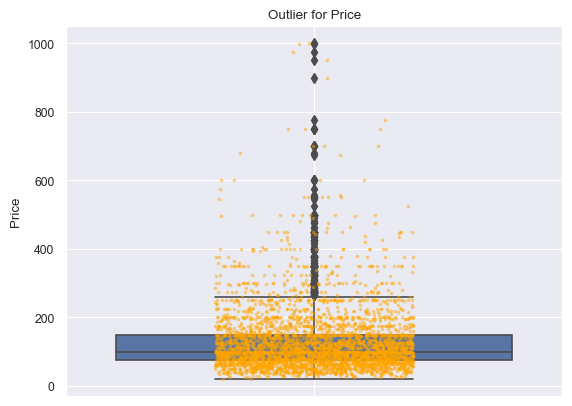

In [134]:
sns.boxplot(y='price', data=listings)
sns.stripplot(y='price', data=listings, color="orange", alpha=0.5, jitter=0.2, size=2.5)
plt.title("Outlier for Price")
plt.grid(True)
plt.ylabel("Price");
plt.xticks()

In [135]:
##Cleaning boolean based columns
##dropping null values for all boolean based columns as they are not very crucial features
##dropping all rows with missing price values
listings.dropna(subset=boolean_based_columns + ['price'],inplace=True)

### fill missing values with median values

In [137]:
listings.reset_index(drop=True, inplace=True)
si = SimpleImputer(strategy='median')
numerical_columns.remove('log_review_period_days')
num_cols= numerical_columns + price_based_columns
listings[num_cols] = si.fit_transform(listings[num_cols])

In [138]:
listings.dropna(subset=['host_response_rate',"host_acceptance_rate"],inplace=True)
# We drop the host acceptance rate column because all except 1 row has 100% acceptance. 
# No  informative value is added by this column (but we should assess the model with 
# and without the column and check the metrics/performance to retain or drop the feature)

In [139]:
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.replace("%",""),errors='coerce')

In [140]:
#### We will bucketize host_response_rate to the following 
labels = ["Low","Moderate","High","Very High","Exceptional"]
bins = [0,20,40,60,80,100]
listings["host_response_rate"] = pd.cut(listings["host_response_rate"],bins=bins,labels=labels)

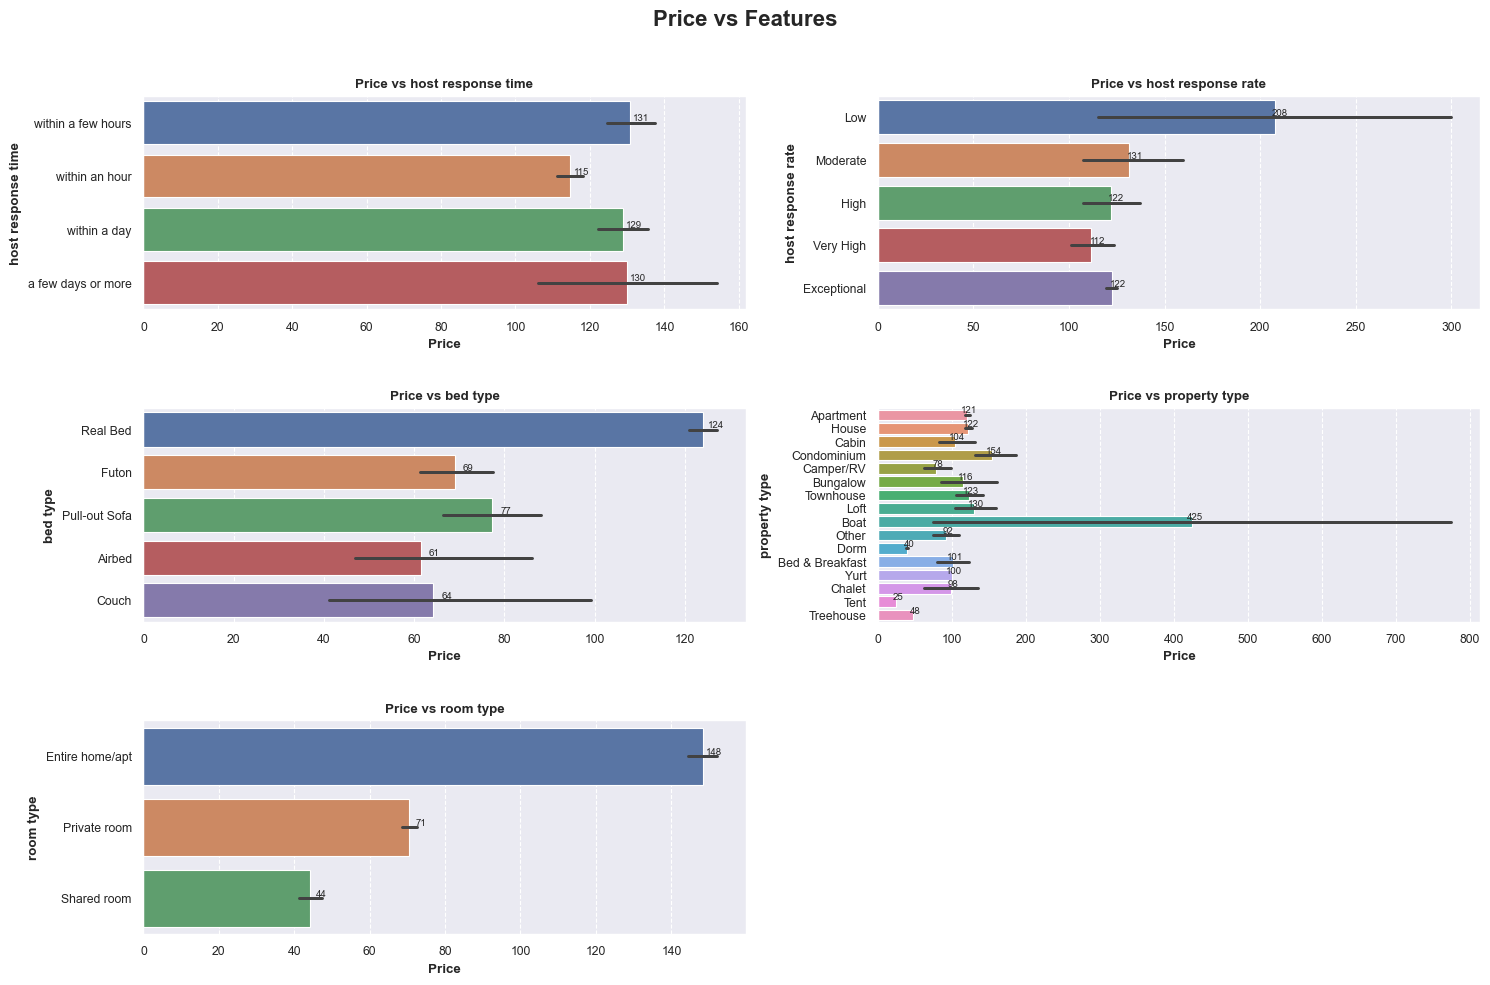

In [141]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle("Price vs Features", fontsize=16,fontweight="heavy")
price_plot_features = ["host_response_time","host_response_rate", "bed_type", "property_type", "room_type"]
y_labels = [string.replace("_", " ") for string in price_plot_features]
ax = axes.ravel()

for i in range(len(price_plot_features)):
    sns.barplot(data=listings, x='price', y=price_plot_features[i], orient='h', ax=ax[i])
    ax[i].set_title(f"Price vs {y_labels[i]}",fontweight="heavy")
    ax[i].set_ylabel(y_labels[i],fontweight="heavy")
    ax[i].set_xlabel("Price",fontweight="heavy")
    ax[i].grid(axis='x', linestyle='--')
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_width():,.0f}', 
                       (p.get_width() + 3, p.get_y() + p.get_height() / 2), 
                       ha='center', va='bottom',fontsize=7)

for j in range(len(price_plot_features),len(ax)):
    ax[j].set_visible(False)
    
plt.tight_layout(rect=[0, 0, 1, 0.96],h_pad=3)  
plt.show()
plt.close()


# Highest prices are available for the real bed, boat type property, entire home/apt, response time within a few hours. 
# the low response rate seems to have the highest prices

In [142]:
listings.dropna(subset=['host_response_time', 'host_response_rate'],inplace=True)

In [143]:
#### Dealing with leftover features with null values
listings.isnull().sum()[listings.isnull().sum() > 0]

neighbourhood    316
zipcode            4
property_type      1
dtype: int64

In [144]:
for i in boolean_based_columns:
    listings[i] = listings[i].map({'t':1,'f':0})
listings[boolean_based_columns].head() 

,host_is_superhost,require_guest_profile_picture,host_has_profile_pic,host_identity_verified,is_location_exact,has_availability,requires_license,instant_bookable,require_guest_phone_verification
0,0,0,1,1,1,1,0,0,0
1,1,1,1,1,1,1,0,0,1
2,0,0,1,1,1,1,0,0,0
6,1,0,1,1,1,1,0,0,0
7,1,1,1,1,1,1,0,0,1


#### Visualize null values

In [146]:
sim = SimpleImputer(strategy='most_frequent')
listings['neighbourhood'] = sim.fit_transform(listings[['neighbourhood']]).ravel()

<Axes: >

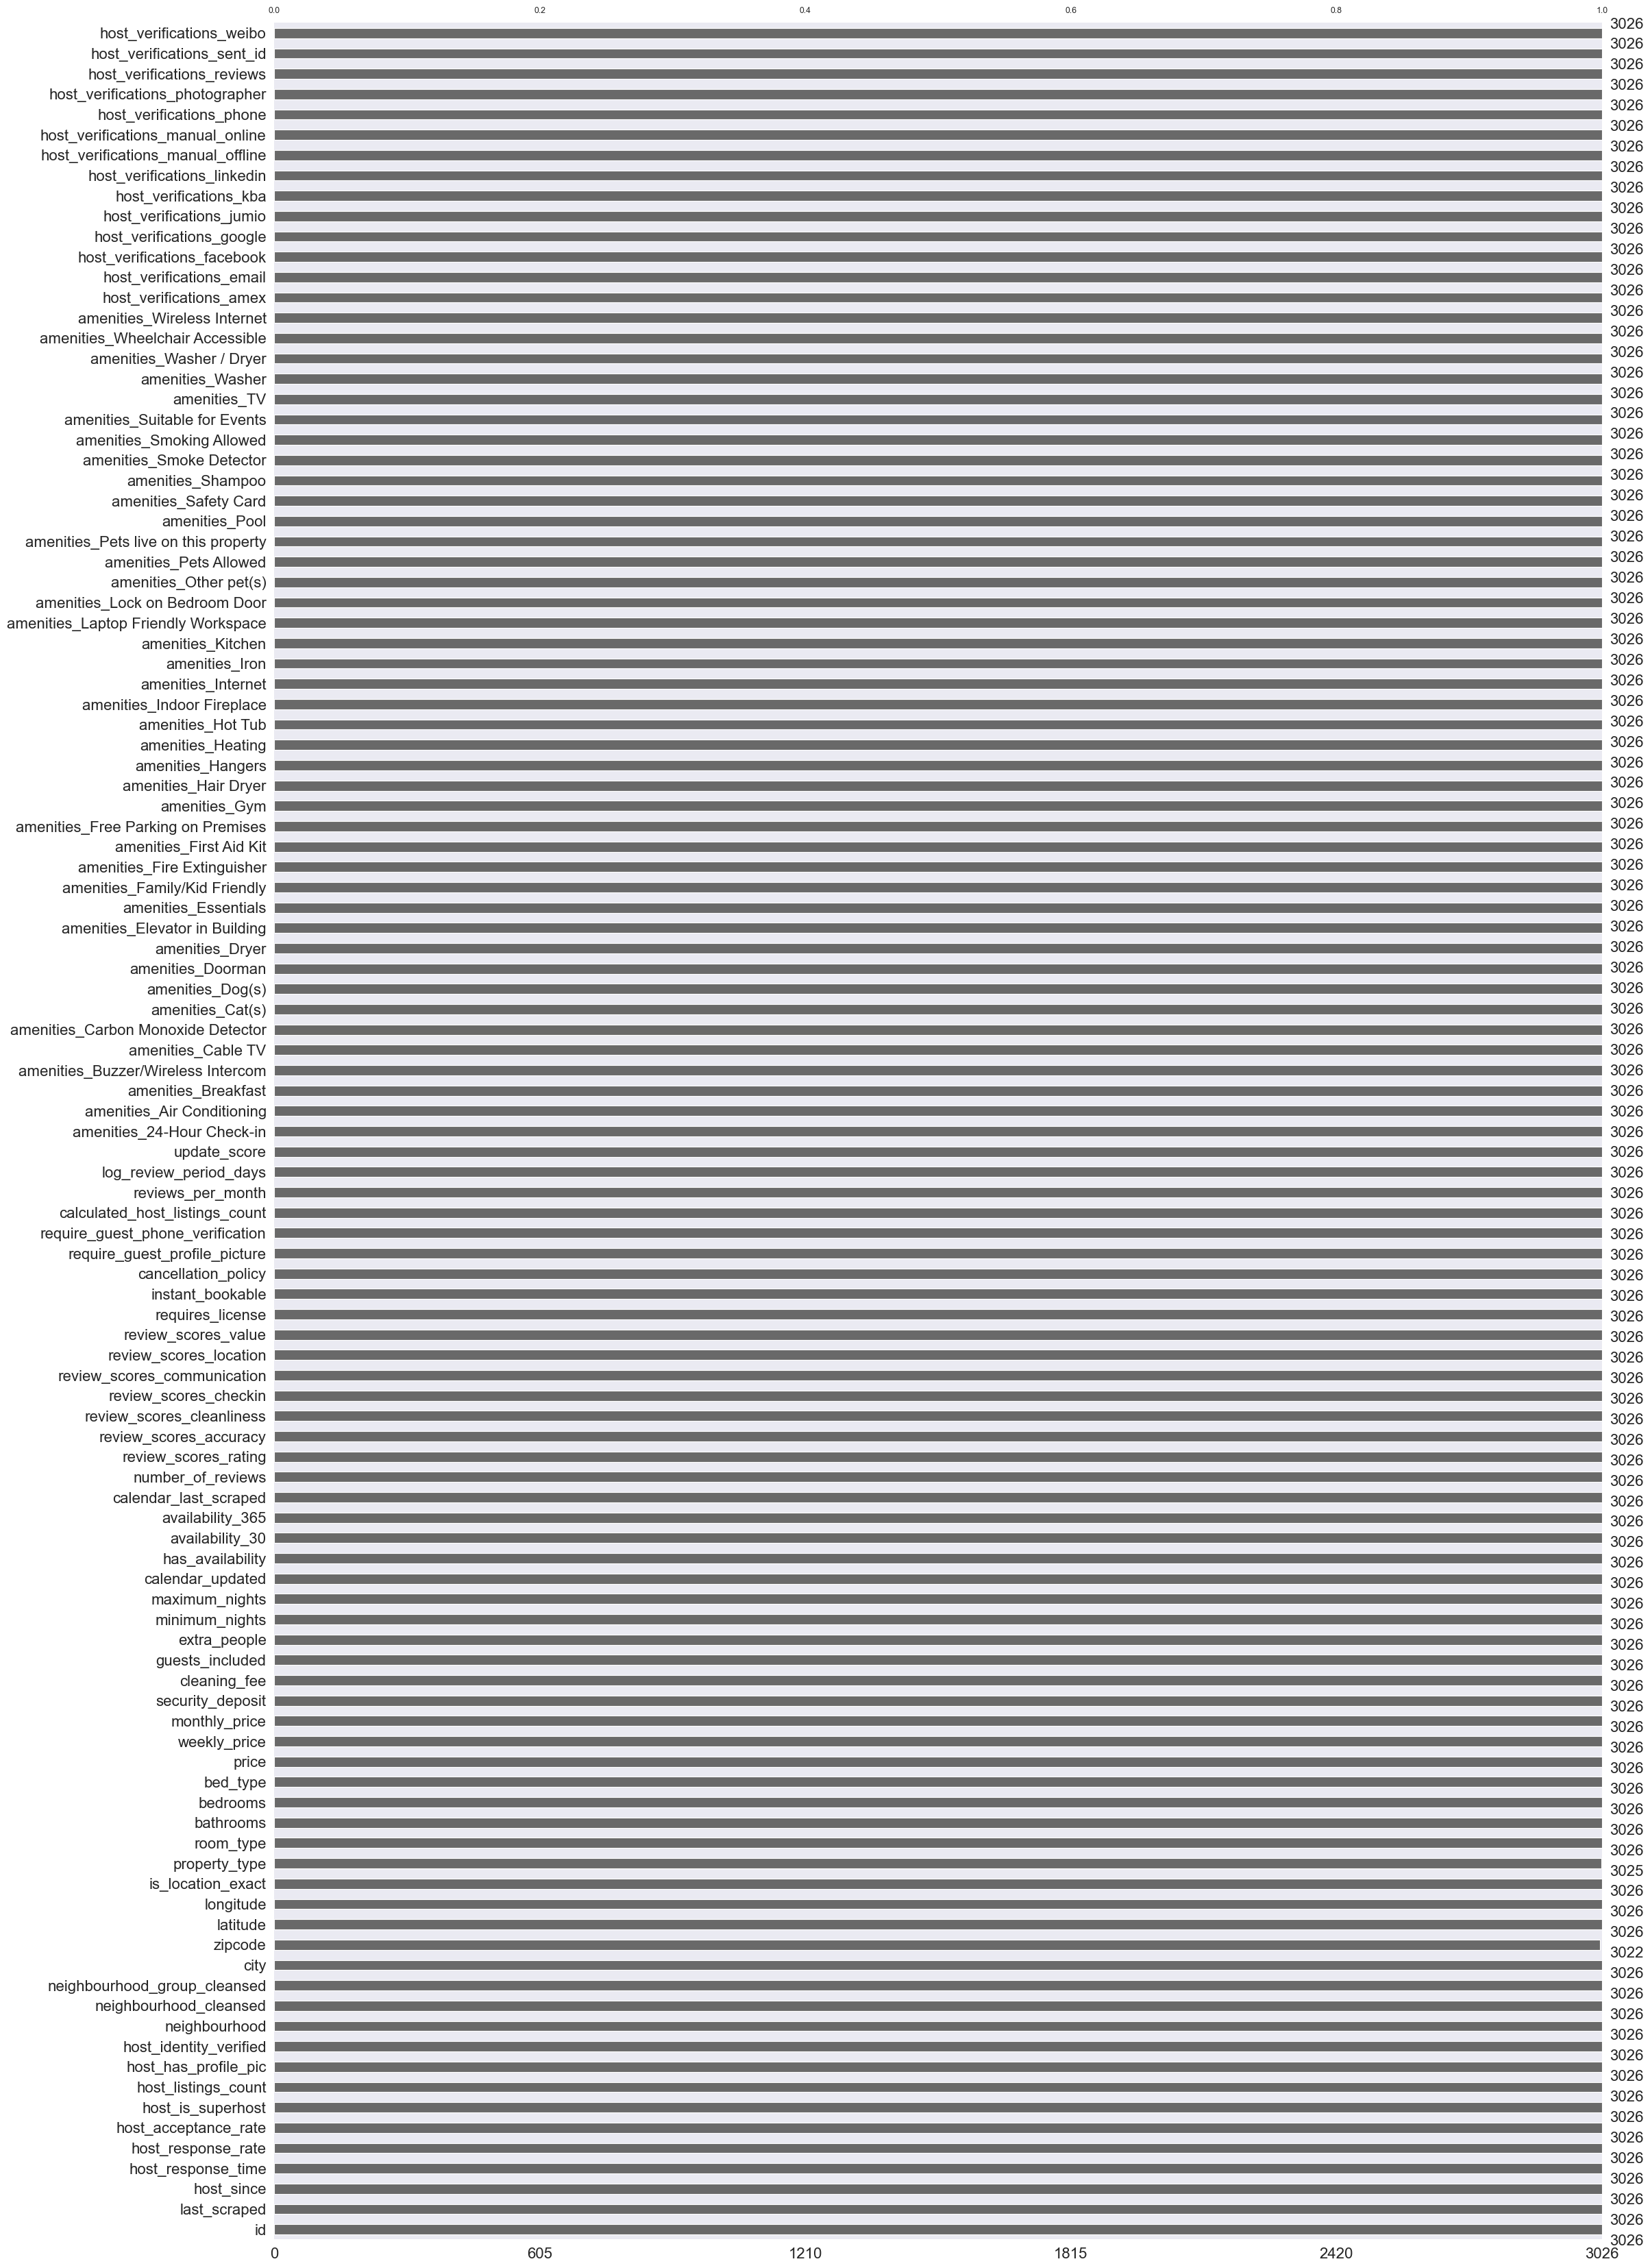

In [147]:
msno.bar(listings) 
# to check if all the null values have been addressed or not. 

In [148]:
listings['neighbourhood'].unique()

array(['Queen Anne', 'Capitol Hill', 'Ballard', 'Phinney Ridge',
       'Fremont', 'Lower Queen Anne', 'Westlake', 'Wallingford',
       'Green Lake', 'Minor', 'Madrona', 'Leschi', 'University District',
       'Roosevelt', 'Harrison/Denny-Blaine', 'Madison Park', 'Atlantic',
       'Central Business District', 'Pike Place Market', 'Pike Market',
       'Eastlake', 'Portage Bay', 'South Lake Union', 'Magnolia',
       'Belltown', 'International District', 'Yesler Terrace',
       'First Hill', 'Pioneer Square', 'Gatewood', 'The Junction',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill', 'Genesee',
       'Interbay', 'Industrial District', 'North Beacon Hill',
       'Holly Park', 'South Beacon Hill', 'Greenwood', 'Bitter Lake',
       'Fauntleroy', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'Windermere',
       'View Ridge', 'Dunlap', 'Rainier Beach', 'Mount Baker',
       'North Delridge', 'Maple Leaf', 'Bryant', '

In [149]:
average_price_nbd = listings[['neighbourhood','price','monthly_price','weekly_price']].groupby(['neighbourhood']).mean().sort_values(by='price',ascending=False)
average_price_nbd

,price,monthly_price,weekly_price
neighbourhood,,,
Portage Bay,248.461538,4200.000000,1200.000000
Westlake,234.166667,2100.000000,766.666667
Alki,180.375000,2799.062500,953.500000
Pike Place Market,172.562500,2996.843750,984.375000
Windermere,170.000000,2310.000000,655.000000
...,...,...,...
Olympic Hills,63.500000,2200.000000,506.250000
Riverview,63.333333,2200.000000,566.666667
Victory Heights,59.714286,1492.857143,426.428571


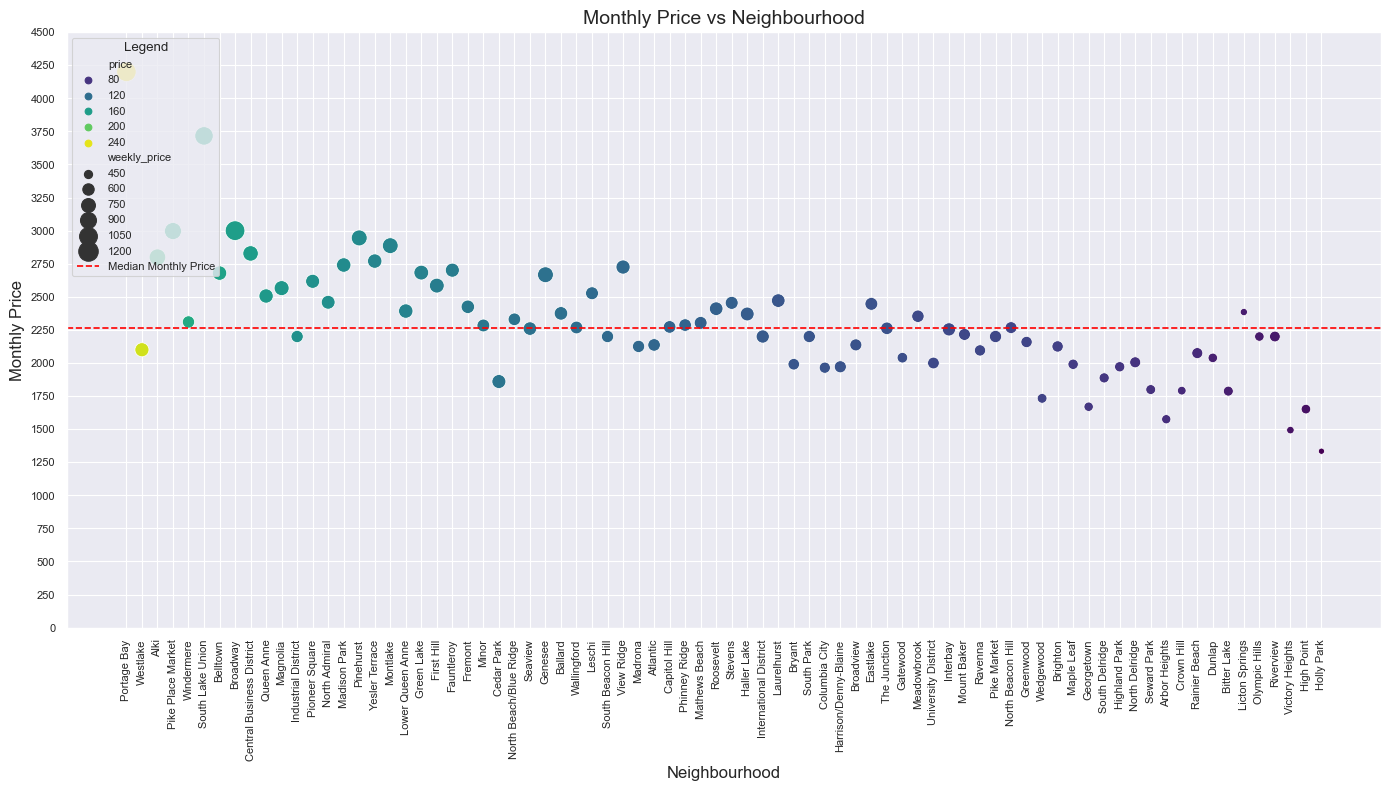

In [150]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=average_price_nbd, x=average_price_nbd.index, y='monthly_price',
                hue='price', size='weekly_price', palette='viridis', sizes=(20, 200))
plt.xticks(rotation=90, fontsize=8)
plt.yticks(range(0,4501,250), fontsize=8)
plt.title("Monthly Price vs Neighbourhood", fontsize=14)
plt.xlabel("Neighbourhood", fontsize=12)
plt.ylabel("Monthly Price", fontsize=12)
plt.grid(True)
median_monthly_price = average_price_nbd['monthly_price'].median()
plt.axhline(median_monthly_price, color='red', linestyle='--', label='Median Monthly Price')
plt.legend(title="Legend", loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()
plt.close()

Text(0.5, 1.0, 'Price Distribution by Neighborhood')

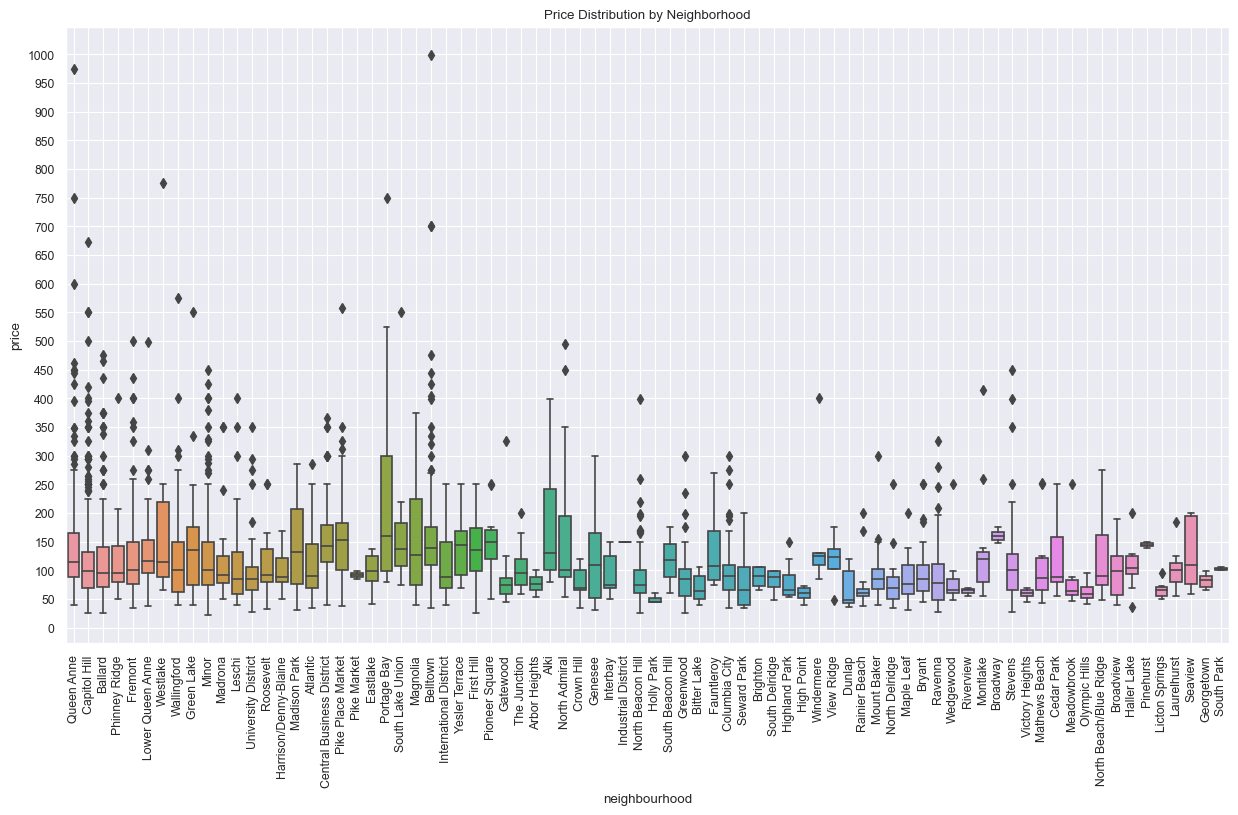

In [151]:
### visualizing price distributions across nbds
plt.figure(figsize=(15,8))
sns.boxplot(data=listings, x='neighbourhood',y='price')
plt.xticks(rotation=90)
plt.grid(True)
plt.yticks(range(0,1001,50))
plt.title('Price Distribution by Neighborhood')